Importing the necesary libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_stata('ca_indresp_w_POLS0010.dta')
data.head()

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,ca_age,ca_sex,ca_couple,ca_hhcompa,...,ca_sempgovt,ca_keyworker,ca_wah,ca_timechcare,ca_auditc1_cv,ca_auditc3_cv,ca_smoker,ca_scghq1_dv,ca_gor_dv,ca_betaindin_xw
0,76165,19,6,1982,british/english/scottish/welsh/northern irish ...,born in uk,37,Female,Yes,2+,...,Inapplicable,No,Always,20,No,Inapplicable,No,12,West Midlands,0.000000
1,280165,67,15,1979,british/english/scottish/welsh/northern irish ...,born in uk,40,Female,Yes,0,...,Inapplicable,No,Never,10,Yes,2-3 times per week,No,6,South East,0.537904
2,469205,106,25,1990,british/english/scottish/welsh/northern irish ...,born in uk,30,Female,No,2+,...,Inapplicable,Yes,Never,90,Yes,2-4 times in total,No,18,East Midlands,0.000000
3,599765,130,33,1986,british/english/scottish/welsh/northern irish ...,born in uk,33,Female,Yes,0,...,Inapplicable,Yes,Always,Inapplicable,No,Inapplicable,No,7,West Midlands,0.322060
4,732365,157,43,1985,british/english/scottish/welsh/northern irish ...,born in uk,34,Male,No,0,...,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,Yes,22,North West,2.375521


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 17451
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pidp             17452 non-null  int32   
 1   psu              17452 non-null  category
 2   strata           17452 non-null  category
 3   birthy           17452 non-null  category
 4   racel_dv         17452 non-null  category
 5   bornuk_dv        17452 non-null  category
 6   ca_age           17452 non-null  category
 7   ca_sex           17452 non-null  category
 8   ca_couple        17452 non-null  category
 9   ca_hhcompa       17452 non-null  category
 10  ca_hhcompb       17452 non-null  category
 11  ca_hhcompc       17452 non-null  category
 12  ca_hadsymp       17452 non-null  category
 13  ca_tested        17452 non-null  category
 14  ca_testresult    17452 non-null  category
 15  ca_hcond_cv96    17452 non-null  category
 16  ca_sclonely_cv   17452 non-null  categor

We do have to replace some string to int so as to allow uniformity in the values of each columns

In [4]:
data.ca_hhcompa.value_counts()

0     15696
1      1362
2+      394
Name: ca_hhcompa, dtype: int64

In [5]:
data['ca_hhcompa']=data['ca_hhcompa'].replace('2+','2')

In [6]:
data.ca_hhcompa.value_counts()

0    15696
1     1362
2      394
Name: ca_hhcompa, dtype: int64

In [7]:
data.ca_hhcompb.value_counts()

0     13164
1      2272
2      1588
3+      428
Name: ca_hhcompb, dtype: int64

In [8]:
data['ca_hhcompb']=data['ca_hhcompb'].replace('3+','3')

In [11]:
data.ca_hhcompb.value_counts()

0    13164
1     2272
2     1588
3      428
Name: ca_hhcompb, dtype: int64

In [10]:
data.ca_hhcompc.value_counts()

0     15592
1      1666
2+      194
Name: ca_hhcompc, dtype: int64

In [12]:
data['ca_hhcompc']=data['ca_hhcompc'].replace('2+','2')

In [13]:
data.ca_hadsymp.value_counts()

No            15242
Yes            2202
Don't know        7
Missing           1
Name: ca_hadsymp, dtype: int64

In [14]:
data['ca_hadsymp']=data['ca_hadsymp'].replace('Missing','No')
data.ca_hadsymp.value_counts()

No            15243
Yes            2202
Don't know        7
Name: ca_hadsymp, dtype: int64

In [15]:
data.ca_tested.value_counts()

No            17265
Yes             181
Missing           3
Don't know        2
Refusal           1
Name: ca_tested, dtype: int64

In [16]:
data['ca_tested']=data['ca_tested'].replace('Missing','No')
data.ca_tested.value_counts()

No            17268
Yes             181
Don't know        2
Refusal           1
Name: ca_tested, dtype: int64

In [17]:
data.ca_testresult.value_counts()

Inapplicable                                       17271
Negative - it showed I did not have coronavirus      117
Positive - it showed I had coronavirus                30
Waiting for results                                   28
Inconclusive                                           6
Name: ca_testresult, dtype: int64

In [18]:
data['ca_testresult']=data['ca_testresult'].str.split(' ').str[0]
data.ca_testresult.value_counts()

Inapplicable    17271
Negative          117
Positive           30
Waiting            28
Inconclusive        6
Name: ca_testresult, dtype: int64

In [19]:
data.ca_hcond_cv96.value_counts()

Mentioned        8789
Not mentioned    8548
Inapplicable       49
Don't know         33
Refusal            21
Missing            12
Name: ca_hcond_cv96, dtype: int64

In [20]:
data['ca_hcond_cv96']=data['ca_hcond_cv96'].replace('Missing','Mentioned')
data.ca_hcond_cv96.value_counts()

Mentioned        8801
Not mentioned    8548
Inapplicable       49
Don't know         33
Refusal            21
Name: ca_hcond_cv96, dtype: int64

In [21]:
data.ca_sclonely_cv.value_counts()

Hardly ever or never    10717
Some of the time         4947
Often                    1276
Inapplicable              504
Don't know                  4
Refusal                     4
Name: ca_sclonely_cv, dtype: int64

In [22]:
data['ca_sclonely_cv']=data['ca_sclonely_cv'].replace('Hardly ever or never', 'Never')
data['ca_sclonely_cv']=data['ca_sclonely_cv'].replace('Some of the time', 'Sometime')
data.ca_sclonely_cv.value_counts()

Never           10717
Sometime         4947
Often            1276
Inapplicable      504
Don't know          4
Refusal             4
Name: ca_sclonely_cv, dtype: int64

In [23]:
data.ca_blwork.value_counts()

Yes, employed                           9040
No                                      6134
Yes, self-employed                      1367
Inapplicable                             532
Yes, both employed and self-employed     369
Refusal                                    6
Don't know                                 3
Missing                                    1
Name: ca_blwork, dtype: int64

In [24]:
data['ca_blwork']=data['ca_blwork'].replace('Yes, employed','Yes')
data['ca_blwork']=data['ca_blwork'].replace('Yes, self-employed','Yes')
data['ca_blwork']=data['ca_blwork'].replace('Yes, both employed and self-employed','Yes')
data['ca_blwork']=data['ca_blwork'].replace('Missing','Yes')
data.ca_blwork.value_counts()

Yes             10777
No               6134
Inapplicable      532
Refusal             6
Don't know          3
Name: ca_blwork, dtype: int64

In [25]:
data.ca_furlough.value_counts()

Inapplicable    8571
No              7117
Yes             1754
Don't know         5
Refusal            3
Missing            2
Name: ca_furlough, dtype: int64

In [26]:
data['ca_furlough']=data['ca_furlough'].replace('Missing','Inapplicable')
data.ca_furlough.value_counts()

Inapplicable    8573
No              7117
Yes             1754
Don't know         5
Refusal            3
Name: ca_furlough, dtype: int64

In [27]:
data.ca_sempgovt.value_counts()

Inapplicable    17452
Name: ca_sempgovt, dtype: int64

In [28]:
data.ca_keyworker.value_counts()

Inapplicable    7340
No              5588
Yes             4515
Don't know         6
Refusal            3
Name: ca_keyworker, dtype: int64

In [29]:
data.ca_wah.value_counts()

Inapplicable    7344
Never           4720
Always          3623
Sometimes        992
Often            769
Refusal            3
Missing            1
Name: ca_wah, dtype: int64

In [30]:
data['ca_wah']=data['ca_wah'].replace('Missing','Inapplicable')
data.ca_wah.value_counts()

Inapplicable    7345
Never           4720
Always          3623
Sometimes        992
Often            769
Refusal            3
Name: ca_wah, dtype: int64

In [31]:
data.ca_auditc1_cv.value_counts()

Yes             11374
No               4752
Inapplicable     1319
Refusal             5
Don't know          2
Name: ca_auditc1_cv, dtype: int64

In [32]:
data.ca_auditc3_cv.value_counts()

Inapplicable          6081
2-3 times per week    3461
2-4 times in total    3204
4-6 times per week    2458
Daily                 1443
Once                   781
Never                   15
Refusal                  8
Don't know               1
Name: ca_auditc3_cv, dtype: int64

In [33]:
data['ca_auditc3_cv']=data['ca_auditc3_cv'].replace('2-3 times per week','three')
data['ca_auditc3_cv']=data['ca_auditc3_cv'].replace('2-4 times in total','four')
data['ca_auditc3_cv']=data['ca_auditc3_cv'].replace('4-6 times per week','six')
data.ca_auditc3_cv.value_counts()

Inapplicable    6081
three           3461
four            3204
six             2458
Daily           1443
Once             781
Never             15
Refusal            8
Don't know         1
Name: ca_auditc3_cv, dtype: int64

In [34]:
data.ca_smoker.value_counts()

No              14721
Yes              1394
Inapplicable     1332
Don't know          2
Refusal             2
Missing             1
Name: ca_smoker, dtype: int64

In [35]:
data['ca_smoker']=data['ca_smoker'].replace('Missing','No')
data.ca_smoker.value_counts()

No              14722
Yes              1394
Inapplicable     1332
Don't know          2
Refusal             2
Name: ca_smoker, dtype: int64

In [36]:
data.ca_timechcare.value_counts()

Inapplicable    11882
0                1686
10                434
20                358
5                 327
                ...  
95                  1
44                  1
68                  1
13                  1
74                  1
Name: ca_timechcare, Length: 93, dtype: int64

In [37]:
data['ca_timechcare'].isnull().sum()

0

In [40]:
data['ca_timechcare']=data['ca_timechcare'].fillna(data['ca_timechcare'].mean())

In [41]:
data['ca_timechcare'].isnull().sum()

0

In [39]:
data['ca_timechcare'] = np.floor(pd.to_numeric(data['ca_timechcare'], errors='coerce')).astype('Float64')

In [42]:
data['ca_timechcare'].mean()

17.277110659520268

In [43]:
data['ca_scghq1_dv'].value_counts()

Missing    1674
12         1494
6          1307
11         1215
7          1174
10         1167
8          1147
9          1094
13          993
14          782
15          650
16          583
17          505
18          440
5           385
19          364
20          312
21          266
22          253
23          232
4           211
24          163
25          141
3           122
26          112
27           90
2            79
28           76
29           70
30           53
36           53
31           41
32           40
0            38
1            37
33           34
34           28
35           27
Name: ca_scghq1_dv, dtype: int64

In [44]:
data['ca_scghq1_dv'] = np.floor(pd.to_numeric(data['ca_scghq1_dv'], errors='coerce')).astype('Float64')

In [45]:
data['ca_scghq1_dv'].isna().sum()

1674

In [46]:
data['ca_scghq1_dv']=data['ca_scghq1_dv'].fillna(data['ca_scghq1_dv'].mean())

In [47]:
data['ca_scghq1_dv'].isna().sum()

0

In [48]:
data.strata.value_counts()

701     380
3321    373
5123    343
5122    198
5124    183
       ... 
3362      1
3925      1
3361      1
3360      1
3224      1
Name: strata, Length: 1780, dtype: int64

In [49]:
data.ca_age.value_counts()

52    399
55    396
60    382
57    378
54    370
     ... 
92      5
94      1
95      1
93      1
96      1
Name: ca_age, Length: 81, dtype: int64

In [50]:
data.ca_gor_dv.value_counts()

South East                  2428
London                      1849
North West                  1716
East of England             1689
South West                  1598
Scotland                    1523
Yorkshire and The Humber    1482
West Midlands               1479
East Midlands               1334
Wales                       1018
Northern Ireland             742
North East                   593
Missing                        1
Name: ca_gor_dv, dtype: int64

In [51]:
data['ca_gor_dv']=data['ca_gor_dv'].replace('Missing','South East')

In [52]:
data.ca_betaindin_xw.value_counts()

0.000000     3709
19.371353      27
0.693152        2
0.794503        2
17.736874       1
             ... 
0.923556        1
0.923489        1
0.923343        1
0.923053        1
0.734117        1
Name: ca_betaindin_xw, Length: 13716, dtype: int64

In [53]:
data['birthy'].value_counts()

1967       394
1965       392
1964       382
1970       371
1959       369
          ... 
refusal      2
1926         1
1925         1
1924         1
1923         1
Name: birthy, Length: 85, dtype: int64

In [35]:
pd.set_option('max_rows',None)

In [54]:
data['psu'].value_counts()

85       27
47       25
77       24
94       24
88       24
         ..
24858     1
24851     1
24826     1
24726     1
52250     1
Name: psu, Length: 4166, dtype: int64

In [55]:
data=data.drop(['ca_sempgovt'],axis=1)

In [56]:
data.columns

Index(['pidp', 'psu', 'strata', 'birthy', 'racel_dv', 'bornuk_dv', 'ca_age',
       'ca_sex', 'ca_couple', 'ca_hhcompa', 'ca_hhcompb', 'ca_hhcompc',
       'ca_hadsymp', 'ca_tested', 'ca_testresult', 'ca_hcond_cv96',
       'ca_sclonely_cv', 'ca_blwork', 'ca_furlough', 'ca_keyworker', 'ca_wah',
       'ca_timechcare', 'ca_auditc1_cv', 'ca_auditc3_cv', 'ca_smoker',
       'ca_scghq1_dv', 'ca_gor_dv', 'ca_betaindin_xw'],
      dtype='object')

Now, after checking the data information, we can observe that all columns apart from pidp is a category data type, we'll need to convert each columns to the right data type based on the values in the column.

In [57]:
data['birthy'] =pd.to_numeric(data['birthy'], errors='coerce').astype('float64') #try to convert to time series
data['psu'] = np.floor(pd.to_numeric(data['psu'], errors='coerce')).astype('Float64')
data['bornuk_dv']=data['bornuk_dv'].astype(str)
data['racel_dv']=data['racel_dv'].astype(str)
data['ca_sex']=data['ca_sex'].astype(str)
data['ca_couple']=data['ca_couple'].astype(str)
data['ca_hhcompb'] = np.floor(pd.to_numeric(data['ca_hhcompb'], errors='coerce')).astype('Float64')
data['ca_hhcompa'] = np.floor(pd.to_numeric(data['ca_hhcompa'], errors='coerce')).astype('Float64')
data['ca_hhcompc'] = np.floor(pd.to_numeric(data['ca_hhcompc'], errors='coerce')).astype('Float64')
data.ca_hadsymp=data.ca_hadsymp.astype(str)
data.ca_tested=data.ca_tested.astype(str)
data.ca_testresult=data.ca_testresult.astype(str)
data.ca_hcond_cv96=data.ca_hcond_cv96.astype(str)
data.ca_sclonely_cv=data.ca_sclonely_cv.astype(str)
data.ca_blwork=data.ca_blwork.astype(str)
data.ca_furlough=data.ca_furlough.astype(str)
data.ca_keyworker=data.ca_keyworker.astype(str)
data.ca_wah=data.ca_wah.astype(str)
data.ca_auditc1_cv=data.ca_auditc1_cv.astype(str)
data.ca_auditc3_cv=data.ca_auditc3_cv.astype(str)
data.ca_smoker=data.ca_smoker.astype(str)
data.ca_gor_dv=data.ca_gor_dv.astype(str)
data.ca_betaindin_xw=data.ca_betaindin_xw.astype(float)
data['strata'] = np.floor(pd.to_numeric(data['strata'], errors='coerce')).astype('Float64')
data.ca_age=data.ca_age.astype(int)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 17451
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pidp             17452 non-null  int32  
 1   psu              17449 non-null  float64
 2   strata           17449 non-null  float64
 3   birthy           17443 non-null  float64
 4   racel_dv         17452 non-null  object 
 5   bornuk_dv        17452 non-null  object 
 6   ca_age           17452 non-null  int32  
 7   ca_sex           17452 non-null  object 
 8   ca_couple        17452 non-null  object 
 9   ca_hhcompa       17452 non-null  float64
 10  ca_hhcompb       17452 non-null  float64
 11  ca_hhcompc       17452 non-null  float64
 12  ca_hadsymp       17452 non-null  object 
 13  ca_tested        17452 non-null  object 
 14  ca_testresult    17452 non-null  object 
 15  ca_hcond_cv96    17452 non-null  object 
 16  ca_sclonely_cv   17452 non-null  object 
 17  ca_blwork   

In [59]:
data.racel_dv.value_counts()

british/english/scottish/welsh/northern irish (white)    14029
missing                                                    600
indian (asian or asian british)                            552
any other white background (white)                         532
pakistani (asian or asian british)                         385
irish (white)                                              245
african (black or black britih)                            201
caribbean (black or black british)                         173
bangladeshi (asian or asian british)                       158
any other asian background (asian or asian british)        116
white and black caribbean (mixed)                          102
white and asian (mixed)                                     85
chinese (asian or asian british)                            70
any other mixed background (mixed)                          66
any other ethnic group (other ethnic group)                 52
arab (other ethnic group)                              

In [60]:
data['racel_dv']=data['racel_dv'].replace('british/english/scottish/welsh/northern irish (white)', 'british')
data['racel_dv']=data['racel_dv'].replace('indian (asian or asian british)', 'indian')
data['racel_dv']=data['racel_dv'].replace('any other white background (white)', 'white')
data['racel_dv']=data['racel_dv'].replace('pakistani (asian or asian british)', 'pakistani')
data['racel_dv']=data['racel_dv'].replace('irish (white)','irish')
data['racel_dv']=data['racel_dv'].replace('african (black or black britih)', 'african')
data['racel_dv']=data['racel_dv'].replace('caribbean (black or black british)','caribbean')
data['racel_dv']=data['racel_dv'].replace('bangladeshi (asian or asian british)', 'bangladeshi')
data['racel_dv']=data['racel_dv'].replace('any other asian background (asian or asian british)', 'asian')
data['racel_dv']=data['racel_dv'].replace('white and black caribbean (mixed)','mixed_caribbean')
data['racel_dv']=data['racel_dv'].replace('white and asian (mixed)','mixed_caribbean')
data['racel_dv']=data['racel_dv'].replace('white and asian (mixed)','mixed_asian')
data['racel_dv']=data['racel_dv'].replace('chinese (asian or asian british)', 'chinese')
data['racel_dv']=data['racel_dv'].replace('any other mixed background (mixed)','mixed')
data['racel_dv']=data['racel_dv'].replace('any other ethnic group (other ethnic group)', 'other_ethnic')
data['racel_dv']=data['racel_dv'].replace('arab (other ethnic group)','arab')
data['racel_dv']=data['racel_dv'].replace('white and black african (mixed)','mixed_african')
data['racel_dv']=data['racel_dv'].replace('any other black background (black or black britih)','black_british')
data['racel_dv']=data['racel_dv'].replace('gypsy or irish traveller (white)','gypsy')

In [61]:
data.racel_dv.value_counts()

british            14029
missing              600
indian               552
white                532
pakistani            385
irish                245
african              201
mixed_caribbean      187
caribbean            173
bangladeshi          158
asian                116
chinese               70
mixed                 66
other_ethnic          52
arab                  35
mixed_african         31
black_british         18
gypsy                  2
Name: racel_dv, dtype: int64

Numerical columns will be filled with the mean of the values in the columns while categorical values would be filled with the mode of the vaues in the column

In [62]:
data.isna().sum()

pidp               0
psu                3
strata             3
birthy             9
racel_dv           0
bornuk_dv          0
ca_age             0
ca_sex             0
ca_couple          0
ca_hhcompa         0
ca_hhcompb         0
ca_hhcompc         0
ca_hadsymp         0
ca_tested          0
ca_testresult      0
ca_hcond_cv96      0
ca_sclonely_cv     0
ca_blwork          0
ca_furlough        0
ca_keyworker       0
ca_wah             0
ca_timechcare      0
ca_auditc1_cv      0
ca_auditc3_cv      0
ca_smoker          0
ca_scghq1_dv       0
ca_gor_dv          0
ca_betaindin_xw    0
dtype: int64

In [63]:
data['strata']=data['strata'].fillna(data['strata'].mean())
data['psu']=data['ca_timechcare'].fillna(data['psu'].mean())
data['birthy']=data['birthy'].fillna(data['birthy'].mean())

In [64]:
data.isna().sum()

pidp               0
psu                0
strata             0
birthy             0
racel_dv           0
bornuk_dv          0
ca_age             0
ca_sex             0
ca_couple          0
ca_hhcompa         0
ca_hhcompb         0
ca_hhcompc         0
ca_hadsymp         0
ca_tested          0
ca_testresult      0
ca_hcond_cv96      0
ca_sclonely_cv     0
ca_blwork          0
ca_furlough        0
ca_keyworker       0
ca_wah             0
ca_timechcare      0
ca_auditc1_cv      0
ca_auditc3_cv      0
ca_smoker          0
ca_scghq1_dv       0
ca_gor_dv          0
ca_betaindin_xw    0
dtype: int64

In [ ]:
pd.set_option('display.max_rows',None )

In [65]:
data.isna().sum()

pidp               0
psu                0
strata             0
birthy             0
racel_dv           0
bornuk_dv          0
ca_age             0
ca_sex             0
ca_couple          0
ca_hhcompa         0
ca_hhcompb         0
ca_hhcompc         0
ca_hadsymp         0
ca_tested          0
ca_testresult      0
ca_hcond_cv96      0
ca_sclonely_cv     0
ca_blwork          0
ca_furlough        0
ca_keyworker       0
ca_wah             0
ca_timechcare      0
ca_auditc1_cv      0
ca_auditc3_cv      0
ca_smoker          0
ca_scghq1_dv       0
ca_gor_dv          0
ca_betaindin_xw    0
dtype: int64

In [66]:
data.describe()

,pidp,psu,strata,birthy,ca_age,ca_hhcompa,ca_hhcompb,ca_hhcompc,ca_timechcare,ca_scghq1_dv,ca_betaindin_xw
count,1.745200e+04,17452.000000,17452.000000,17452.000000,17452.000000,17452.000000,17452.000000,17452.000000,17452.000000,17452.000000,17452.000000
mean,7.759816e+08,17.277111,2290.588572,1968.792524,50.526645,0.123195,0.385744,0.117694,17.277111,12.451768,0.787474
std,4.668566e+08,14.967358,1318.891283,17.021965,17.028230,0.391381,0.752402,0.355080,14.967358,5.756943,1.222472
min,7.616500e+04,0.000000,1.000000,1923.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.611235e+08,17.277111,2068.000000,1956.000000,38.000000,0.000000,0.000000,0.000000,17.277111,8.000000,0.194216
50%,7.480813e+08,17.277111,2550.000000,1968.000000,52.000000,0.000000,0.000000,0.000000,17.277111,12.000000,0.625769
75%,1.157189e+09,17.277111,3049.000000,1981.000000,64.000000,0.000000,0.000000,0.000000,17.277111,15.000000,0.949669
max,1.653135e+09,144.000000,5124.000000,2004.000000,96.000000,2.000000,3.000000,2.000000,144.000000,36.000000,19.371353


In [67]:
data.columns

Index(['pidp', 'psu', 'strata', 'birthy', 'racel_dv', 'bornuk_dv', 'ca_age',
       'ca_sex', 'ca_couple', 'ca_hhcompa', 'ca_hhcompb', 'ca_hhcompc',
       'ca_hadsymp', 'ca_tested', 'ca_testresult', 'ca_hcond_cv96',
       'ca_sclonely_cv', 'ca_blwork', 'ca_furlough', 'ca_keyworker', 'ca_wah',
       'ca_timechcare', 'ca_auditc1_cv', 'ca_auditc3_cv', 'ca_smoker',
       'ca_scghq1_dv', 'ca_gor_dv', 'ca_betaindin_xw'],
      dtype='object')

Ready for some Exploratory Data Analysis just to get relationships between each columns of the datasets relating to the targets (Y)

In [68]:
data_num=data[['pidp','psu','strata','ca_age','ca_hhcompa','ca_hhcompb','ca_hhcompc','ca_timechcare','ca_scghq1_dv','ca_betaindin_xw']]
data_cat=data[['racel_dv', 'bornuk_dv','ca_sex', 'ca_couple','ca_hadsymp', 'ca_tested', 'ca_testresult', 'ca_hcond_cv96',
       'ca_sclonely_cv', 'ca_blwork', 'ca_furlough',
       'ca_keyworker', 'ca_wah','ca_auditc1_cv',
       'ca_auditc3_cv', 'ca_smoker','ca_gor_dv']]

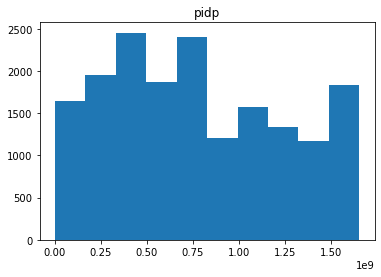

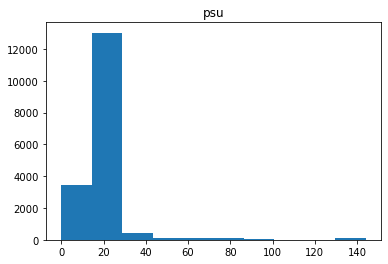

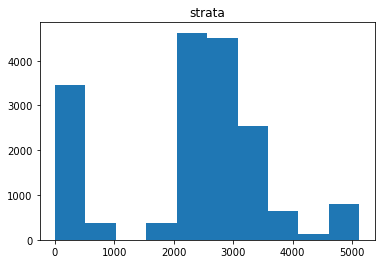

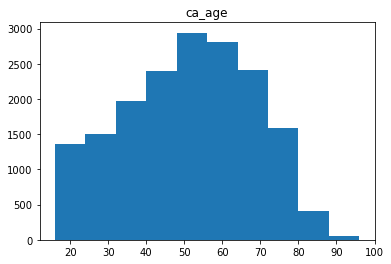

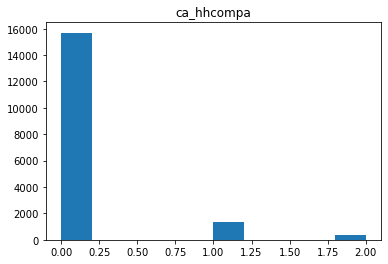

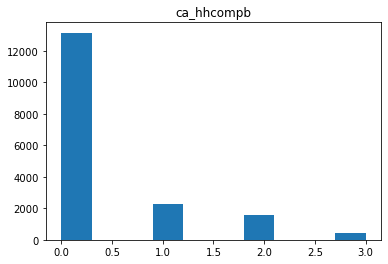

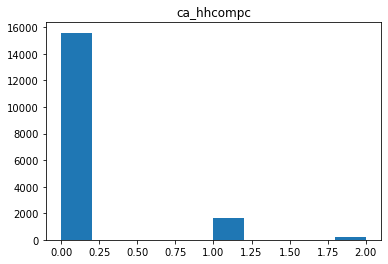

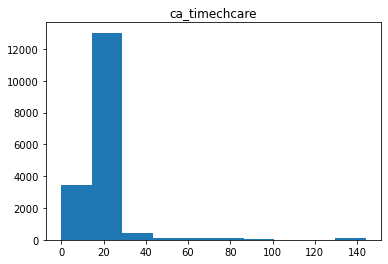

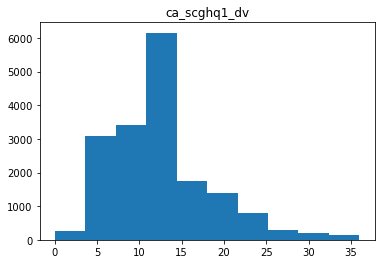

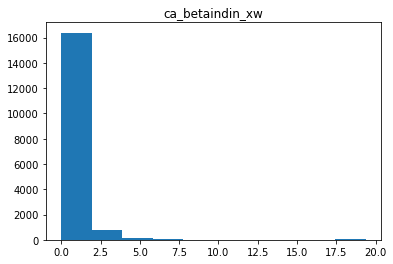

In [69]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

                     pidp       psu    strata    ca_age  ca_hhcompa  \
pidp             1.000000 -0.006623  0.417612 -0.032606    0.027244   
psu             -0.006623  1.000000 -0.012871 -0.052818    0.303129   
strata           0.417612 -0.012871  1.000000 -0.071595    0.054266   
ca_age          -0.032606 -0.052818 -0.071595  1.000000   -0.245775   
ca_hhcompa       0.027244  0.303129  0.054266 -0.245775    1.000000   
ca_hhcompb       0.041398 -0.011725  0.074645 -0.280085    0.094894   
ca_hhcompc       0.039248 -0.227866  0.046796 -0.153728   -0.023933   
ca_timechcare   -0.006623  1.000000 -0.012871 -0.052818    0.303129   
ca_scghq1_dv     0.009553  0.057892  0.012756 -0.163795    0.039195   
ca_betaindin_xw  0.016074 -0.001546 -0.028098 -0.016878   -0.022161   

                 ca_hhcompb  ca_hhcompc  ca_timechcare  ca_scghq1_dv  \
pidp               0.041398    0.039248      -0.006623      0.009553   
psu               -0.011725   -0.227866       1.000000      0.057892   
st

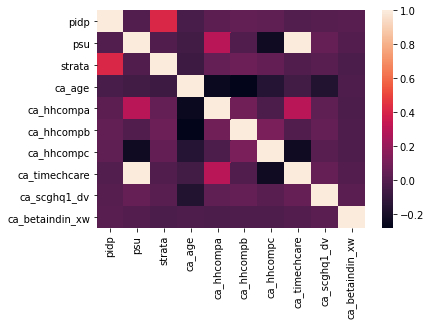

In [70]:
print(data_num.corr())
sns.heatmap(data_num.corr())

After checking their respective correlations, values that are closer to +1 are considered highly correlated and closer to -1 are considered highly negative correlated

And also, getting the pivot details in terms of the mean showings different mean values at different stages of the target variable

In [71]:
data_pivot=pd.pivot_table(data, index='ca_scghq1_dv', values=['pidp','psu','strata','birthy','ca_age','ca_hhcompa','ca_hhcompb','ca_hhcompc','ca_timechcare','ca_betaindin_xw'])
data_pivot

,birthy,ca_age,ca_betaindin_xw,ca_hhcompa,ca_hhcompb,ca_hhcompc,ca_timechcare,pidp,psu,strata
ca_scghq1_dv,,,,,,,,,,
0.000000,1974.078947,45.184211,0.726388,0.157895,0.500000,0.105263,18.487953,7.538208e+08,18.487953,2564.236842
1.000000,1972.891892,46.432432,0.591908,0.108108,0.621622,0.189189,17.496582,7.195396e+08,17.496582,1914.405405
2.000000,1968.746835,50.607595,0.744720,0.164557,0.417722,0.151899,19.177522,7.798641e+08,19.177522,2166.126582
3.000000,1969.852459,49.508197,0.858000,0.122951,0.401639,0.057377,17.130260,7.884734e+08,17.130260,2300.450820
4.000000,1968.658768,50.677725,0.721579,0.061611,0.459716,0.137441,16.949810,7.182818e+08,16.949810,2145.981043
5.000000,1967.345455,51.987013,0.658877,0.127273,0.412987,0.150649,16.214303,7.586253e+08,16.214303,2231.800000
6.000000,1962.881249,56.442234,0.824009,0.087988,0.265493,0.094109,16.067212,7.716361e+08,16.067212,2239.526396
7.000000,1962.934412,56.381601,0.721178,0.074106,0.269165,0.099659,16.527844,7.640169e+08,16.527844,2236.541738
8.000000,1963.540541,55.770706,0.821080,0.095031,0.329555,0.102877,16.255367,7.461111e+08,16.255367,2233.997384


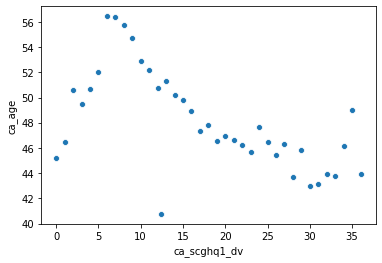

In [72]:
sns.scatterplot(data_pivot.index,data_pivot.ca_age)

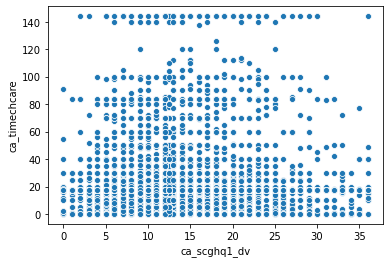

In [73]:
sns.scatterplot(data.ca_scghq1_dv,data.ca_timechcare)

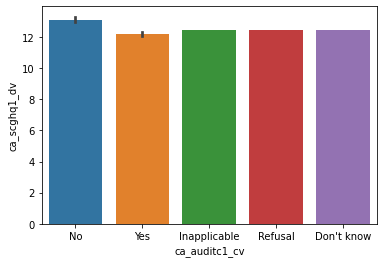

In [74]:
sns.barplot(data.ca_auditc1_cv,data.ca_scghq1_dv)

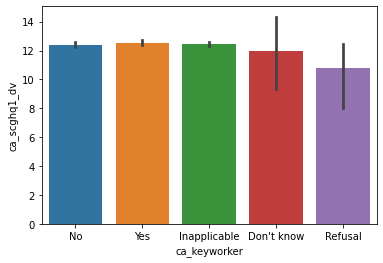

In [75]:
sns.barplot(data.ca_keyworker,data.ca_scghq1_dv)

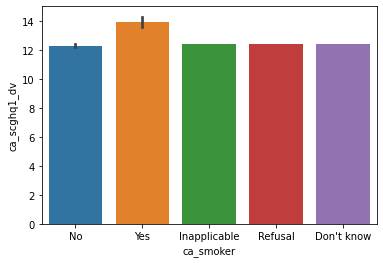

In [76]:
sns.barplot(data.ca_smoker,data.ca_scghq1_dv)

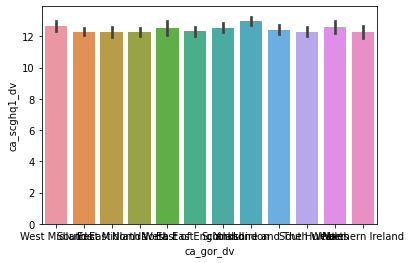

In [77]:
sns.barplot(data.ca_gor_dv,data.ca_scghq1_dv)

Scaling our numerical columns as it is important in linear regression so as for our variables to be scaleable

In [79]:
from sklearn import preprocessing

In [80]:
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [82]:
scaler=preprocessing.StandardScaler()

In [83]:
sig_num_col=['pidp','psu','strata','ca_age','ca_hhcompa','ca_hhcompb','ca_hhcompc','ca_timechcare','ca_scghq1_dv','ca_betaindin_xw']

In [84]:
import warnings
warnings.filterwarnings("ignore")
data[sig_num_col]=scaler.fit_transform(data[sig_num_col])

In [85]:
data.head()

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,ca_age,ca_sex,ca_couple,ca_hhcompa,...,ca_furlough,ca_keyworker,ca_wah,ca_timechcare,ca_auditc1_cv,ca_auditc3_cv,ca_smoker,ca_scghq1_dv,ca_gor_dv,ca_betaindin_xw
0,-1.662026,0.181927,-1.732253,1982.0,british,born in uk,-0.794389,Female,Yes,4.795475,...,No,No,Always,0.181927,No,Inapplicable,No,-0.078476,West Midlands,-0.644184
1,-1.661589,-0.486213,-1.725429,1979.0,british,born in uk,-0.618206,Female,Yes,-0.314779,...,Yes,No,Never,-0.486213,Yes,three,No,-1.120726,South East,-0.204158
2,-1.661184,4.858905,-1.717847,1990.0,british,born in uk,-1.205482,Female,No,4.795475,...,No,Yes,Never,4.858905,Yes,four,No,0.963774,East Midlands,-0.644184
3,-1.660904,0.000000,-1.711781,1986.0,british,born in uk,-1.029299,Female,Yes,-0.314779,...,No,Yes,Always,0.000000,No,Inapplicable,No,-0.947017,West Midlands,-0.380726
4,-1.660620,0.000000,-1.704199,1985.0,british,born in uk,-0.970572,Male,No,-0.314779,...,Inapplicable,Inapplicable,Inapplicable,0.000000,No,Inapplicable,Yes,1.658607,North West,1.299082


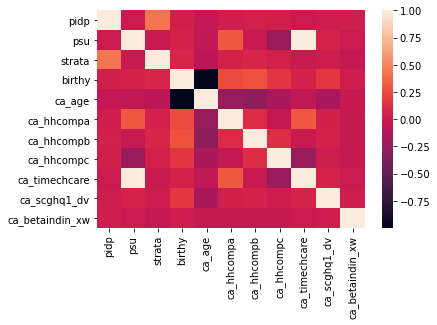

In [86]:
sns.heatmap(data.corr())

In [87]:
data.corr()

,pidp,psu,strata,birthy,ca_age,ca_hhcompa,ca_hhcompb,ca_hhcompc,ca_timechcare,ca_scghq1_dv,ca_betaindin_xw
pidp,1.000000,-0.006623,0.417612,0.033198,-0.032606,0.027244,0.041398,0.039248,-0.006623,0.009553,0.016074
psu,-0.006623,1.000000,-0.012871,0.052646,-0.052818,0.303129,-0.011725,-0.227866,1.000000,0.057892,-0.001546
strata,0.417612,-0.012871,1.000000,0.071811,-0.071595,0.054266,0.074645,0.046796,-0.012871,0.012756,-0.028098
birthy,0.033198,0.052646,0.071811,1.000000,-0.999260,0.245619,0.280798,0.153931,0.052646,0.163555,0.016849
ca_age,-0.032606,-0.052818,-0.071595,-0.999260,1.000000,-0.245775,-0.280085,-0.153728,-0.052818,-0.163795,-0.016878
ca_hhcompa,0.027244,0.303129,0.054266,0.245619,-0.245775,1.000000,0.094894,-0.023933,0.303129,0.039195,-0.022161
ca_hhcompb,0.041398,-0.011725,0.074645,0.280798,-0.280085,0.094894,1.000000,0.115112,-0.011725,0.053048,-0.017250
ca_hhcompc,0.039248,-0.227866,0.046796,0.153931,-0.153728,-0.023933,0.115112,1.000000,-0.227866,0.014052,-0.018841
ca_timechcare,-0.006623,1.000000,-0.012871,0.052646,-0.052818,0.303129,-0.011725,-0.227866,1.000000,0.057892,-0.001546
ca_scghq1_dv,0.009553,0.057892,0.012756,0.163555,-0.163795,0.039195,0.053048,0.014052,0.057892,1.000000,0.020405


In [90]:
data.ca_timechcare

0        0.181927
1       -0.486213
2        4.858905
3        0.000000
4        0.000000
           ...   
17447    0.000000
17448    0.000000
17449   -1.154352
17450    0.000000
17451    0.000000
Name: ca_timechcare, Length: 17452, dtype: float64

Splitting our dataset into inputs(x) and target (y)

In [91]:
x=data.drop(['ca_scghq1_dv'],axis=1)
y=data['ca_scghq1_dv']

In [92]:
x=pd.get_dummies(x, drop_first=True)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=365)

In [106]:
#getting each variable as a constant
x_trainc=sm.add_constant(x_train)
lr_1=sm.OLS(y_train,x_train).fit()

lr_1.params

In [101]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:           ca_scghq1_dv   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     70.73
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:03:30   Log-Likelihood:                -17186.
No. Observations:               13961   AIC:                         3.455e+04
Df Residuals:                   13871   BIC:                         3.523e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
pidp

The P value can be used to determine variables that are significant in prediction. Variables whose p values are greater than 0.05 are not significant in prediction.

In [89]:
from sklearn.linear_model import LinearRegression

In [102]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [103]:
y_pred=regressor.predict(x_train)

In [ ]:
y_pred

In [ ]:
y_test

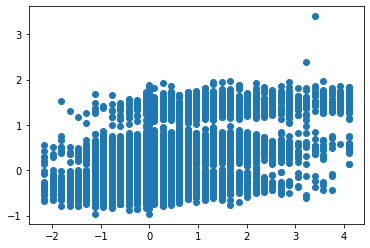

In [104]:
plt.scatter(y_train,y_pred)

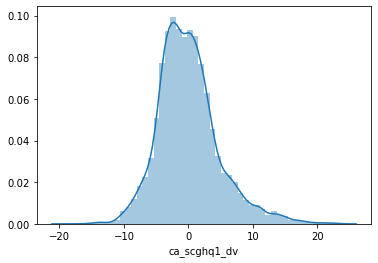

In [93]:
sns.distplot(y_train-y_pred)

In [94]:
regressor.score(x_train,y_train)

0.3121524444375553

# THANKS